## Pré-processamento de dados  - Breast Cancer dataset

* https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('breast_cancer_missing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                569 non-null    int64  
 1   mean_radius              527 non-null    float64
 2   mean_texture             521 non-null    float64
 3   mean_perimeter           508 non-null    float64
 4   mean_area                502 non-null    float64
 5   mean_smoothness          523 non-null    float64
 6   mean_compactness         510 non-null    float64
 7   mean_concavity           502 non-null    float64
 8   mean_concave_points      514 non-null    float64
 9   mean_symmetry            519 non-null    float64
 10  mean_fractal_dimension   513 non-null    float64
 11  radius_error             511 non-null    float64
 12  texture_error            513 non-null    float64
 13  perimeter_error          505 non-null    float64
 14  area_error               5

## Limpeza dos Dados

### Dados Faltantes

In [30]:
df.nunique()

mean_radius                387
mean_texture               402
mean_perimeter             425
mean_area                  428
mean_smoothness            389
mean_compactness           434
mean_concavity             427
mean_concave_points        434
mean_symmetry              366
mean_fractal_dimension     415
radius_error               439
texture_error              428
perimeter_error            424
area_error                 429
smoothness_error           444
compactness_error          431
concavity_error            431
concave_points_error       419
symmetry_error             410
fractal_dimension_error    444
worst_radius               392
worst_texture              419
worst_perimeter            421
worst_area                 436
worst_smoothness           340
worst_compactness          433
worst_concavity            443
worst_concave_points       398
worst_symmetry             408
worst_fractal_dimension    412
diagnosis                    2
dtype: int64

In [4]:
df.isnull().sum()

sample_id                   0
mean_radius                42
mean_texture               48
mean_perimeter             61
mean_area                  67
mean_smoothness            46
mean_compactness           59
mean_concavity             67
mean_concave_points        55
mean_symmetry              50
mean_fractal_dimension     56
radius_error               58
texture_error              56
perimeter_error            64
area_error                 60
smoothness_error           54
compactness_error          60
concavity_error            59
concave_points_error       45
symmetry_error             58
fractal_dimension_error    52
worst_radius               47
worst_texture              58
worst_perimeter            66
worst_area                 60
worst_smoothness           63
worst_compactness          53
worst_concavity            50
worst_concave_points       52
worst_symmetry             59
worst_fractal_dimension    75
diagnosis                  64
dtype: int64

In [5]:
df['diagnosis'].isnull().sum()

64

In [6]:
#Remove os dados faltantes em diagnosis
df.dropna(subset=['diagnosis'],inplace=True)

In [7]:
df['diagnosis'].isnull().sum()

0

In [8]:
# Obtem o nome das colunas com NaN
# Deixa no formato list
nan_columns = df.columns[df.isna().any()].tolist()

In [9]:
# Percorre cada coluna calculando a média
# Substitui todos os NaN pela média
for col in nan_columns:
  media = df[col].mean()
  print(media)
  df[col].fillna(media, inplace=True)

14.199702355460387
19.27627155172414
92.82754966887418
655.7441964285715
0.09656095032397409
0.10429558758314857
0.09061060135135138
0.05012960352422907
0.18145119305856833
0.06304136563876651
0.4074896929824561
1.205546799116998
2.9253336283185836
40.40882926829268
0.007074840611353712
0.026135179600886918
0.032873957743362825
0.012027144708423324
0.020362975770925107
0.003854444857768052
16.408450216450216
25.57175824175824
107.61477876106196
880.6248337028826
0.13211443458980043
0.25396089324618737
0.2738400715835141
0.11536521710526315
0.2903896247240618
0.08413929061784897


In [10]:
df.isnull().sum()

sample_id                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [11]:
# Remove sample_id
df.drop(['sample_id'], axis=1, inplace=True)

In [12]:
# Transforma os dados categóricos de diagnosis
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

In [13]:
df['diagnosis'].value_counts()

diagnosis
0    316
1    189
Name: count, dtype: int64

## Normalização de atributos numéricos

In [14]:
scaler_cols = df.columns[0:30]
print(scaler_cols)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ajuste = scaler.fit(df[scaler_cols])
df[scaler_cols] = ajuste.transform(df[scaler_cols])

In [16]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,1.085817,-2.172329,1.283164,3.421260e-16,1.622464,3.508049e+00,2.736543e+00,2.562904,1.054117e-15,2.394362,...,-1.484189,2.356961,2.106997,1.462564,2.759463,0.000000,2.375010,2.859841,2.124614,1
2,1.572820,0.481953,1.591406,1.646896e+00,0.968696,2.809158e-16,3.625689e-16,2.055453,9.665091e-01,-0.466287,...,-0.007520,1.374195,1.533224,0.597244,1.143226,0.886155,2.020424,0.000000,0.210300,1
3,-0.796309,0.269513,-0.652770,-8.114597e-01,3.412898,3.635574e+00,3.625689e-16,1.455497,2.971777e+00,5.256539,...,0.167159,-0.267728,-0.579187,3.776567,4.104876,2.073151,2.249955,6.292452,5.431268,1
4,1.744704,-1.205359,1.809745,1.929777e+00,0.277781,5.769897e-01,3.625689e-16,1.431710,-2.093352e-02,-0.643549,...,-1.603042,1.365011,1.285206,0.256950,-0.328214,0.633198,0.746131,-0.909796,-0.449808,1
5,-0.501242,-0.873269,-0.439141,-5.376068e-01,2.320808,1.329997e+00,8.776898e-01,0.812990,1.034871e+00,2.000106,...,-0.328065,-0.129039,-0.257318,2.284133,1.816267,1.313273,0.929756,1.821801,2.460780,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              505 non-null    float64
 1   mean_texture             505 non-null    float64
 2   mean_perimeter           505 non-null    float64
 3   mean_area                505 non-null    float64
 4   mean_smoothness          505 non-null    float64
 5   mean_compactness         505 non-null    float64
 6   mean_concavity           505 non-null    float64
 7   mean_concave_points      505 non-null    float64
 8   mean_symmetry            505 non-null    float64
 9   mean_fractal_dimension   505 non-null    float64
 10  radius_error             505 non-null    float64
 11  texture_error            505 non-null    float64
 12  perimeter_error          505 non-null    float64
 13  area_error               505 non-null    float64
 14  smoothness_error         505 no

#### Heatmap com as correlações entre os atributos

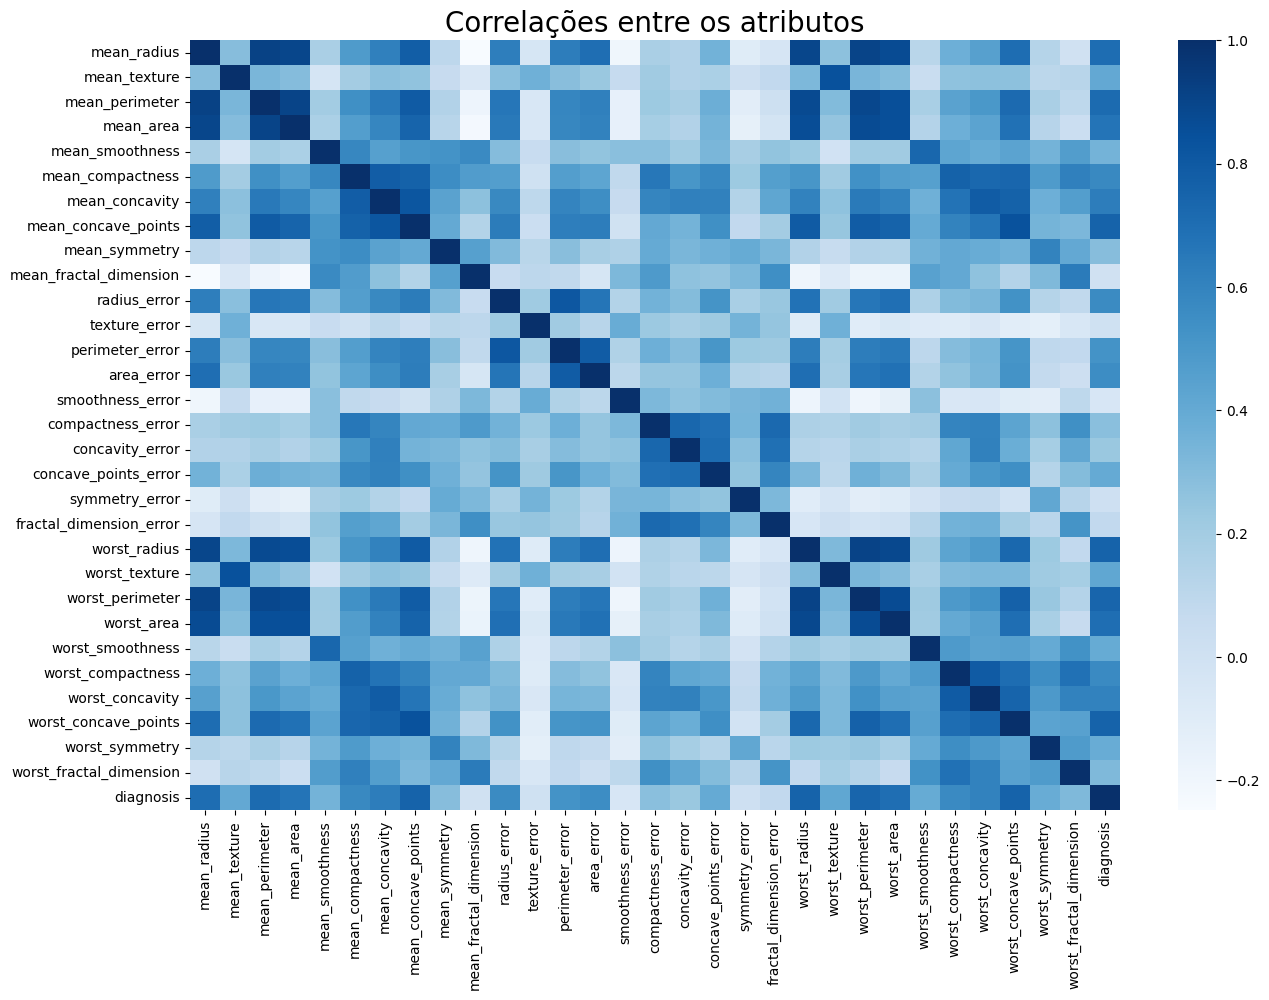

In [18]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues')
plt.title("Correlações entre os atributos", size = 20)
plt.show()

## Pipeline Sklearn
* Permite a criação de diferentes combinações de técnicas
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

### Separação entre treino e teste

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [20]:
 !pip install feature-engine

In [21]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

In [22]:
# Formato dataframe e series
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Configuração das técnicas que serão utilizadas

In [24]:
# forest = RandomForestClassifier(n_estimators = 100)
# forest.fit(X_train, y_train)
# forest_pred = forest.predict(X_test)

# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# knn_pred = knn.predict(X_test)

# Inclusão DecisionTree
from sklearn.tree import DecisionTreeClassifier
forest = DecisionTreeClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [25]:
# Configurações das técnicas de seleção e predição
# forest = RandomForestClassifier(n_estimators = 100)

mi = SelectKBest(mutual_info_classif, k=15)

anova = SelectKBest(f_classif, k=15)

dropC = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson'
)

smartC = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.8,
    selection_method="variance",
    estimator=None
)

In [26]:
# >>> Randon Forest Analysis
# Mutual Information|
forest1 = Pipeline([('mi', mi),
                ('rf', forest)])
forest1.fit(X_train, y_train)
forest1_pred = forest1.predict(X_test)

# Drop Correlated
forest2 = Pipeline([('dropC', dropC),
                ('rf', forest)])
forest2.fit(X_train, y_train)
forest2_pred = forest2.predict(X_test)

# Smart Correlated
forest3 = Pipeline([('smartC', smartC),
                ('rf', forest)])
forest3.fit(X_train, y_train)
forest3_pred = forest3.predict(X_test)

# Anova
forest4 = Pipeline([('Anova', anova),
                ('rf', forest)])
forest4.fit(X_train, y_train)
forest4_pred = forest4.predict(X_test)

# KNN Analysis
# Mutual Information|
knn1 = Pipeline([('mi', mi),
                ('knn', knn)])
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)


NameError: name 'knn' is not defined

### Métricas de avaliação

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

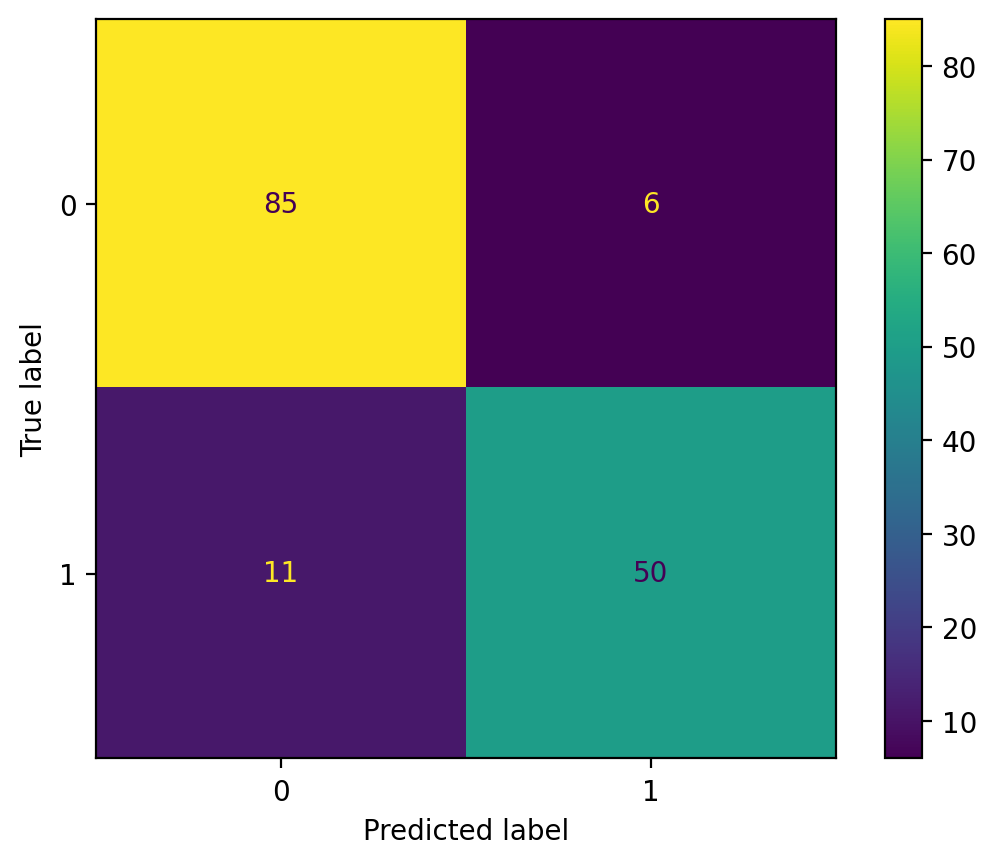

In [ ]:
cm = confusion_matrix(y_test, forest_pred)
ConfusionMatrixDisplay(cm).plot()

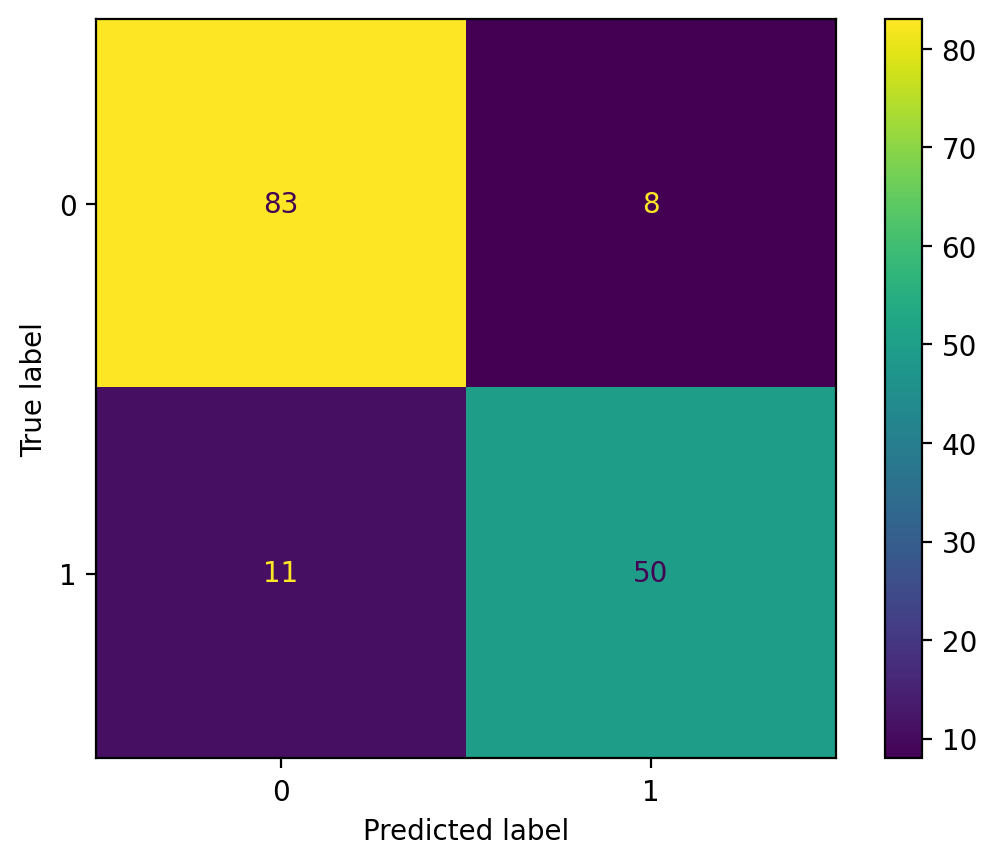

In [ ]:
cm = confusion_matrix(y_test, forest1_pred)
ConfusionMatrixDisplay(cm).plot()

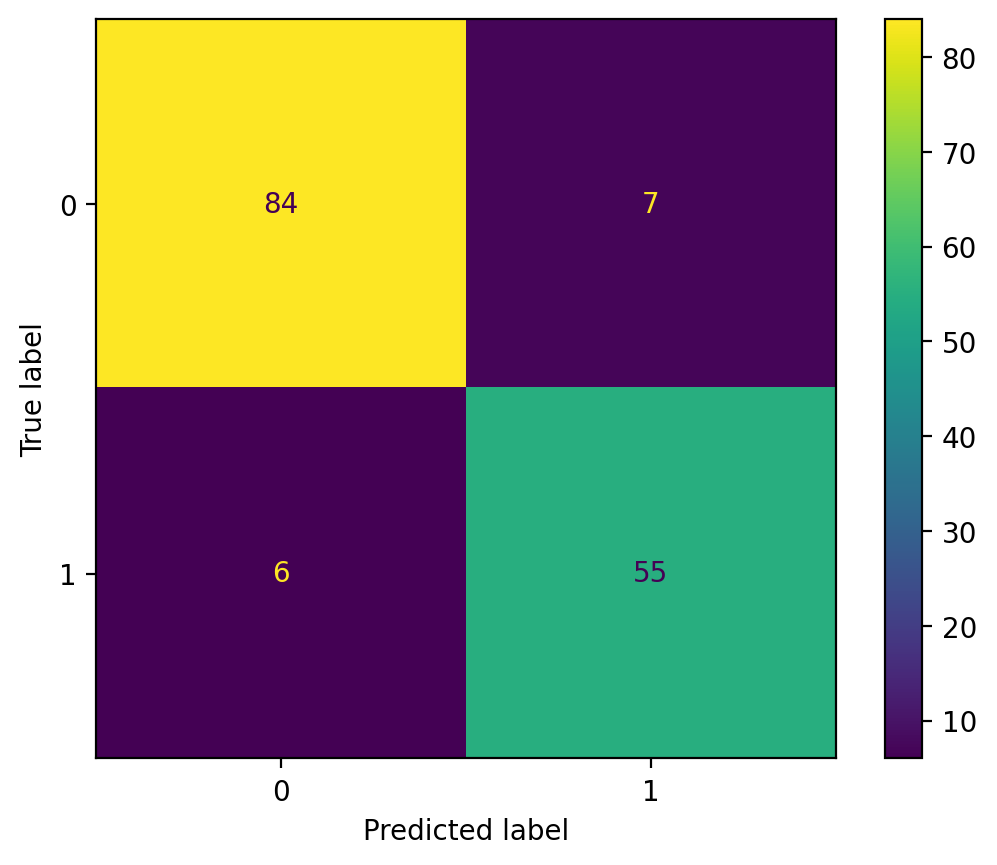

In [ ]:
cm = confusion_matrix(y_test, forest2_pred)
ConfusionMatrixDisplay(cm).plot()

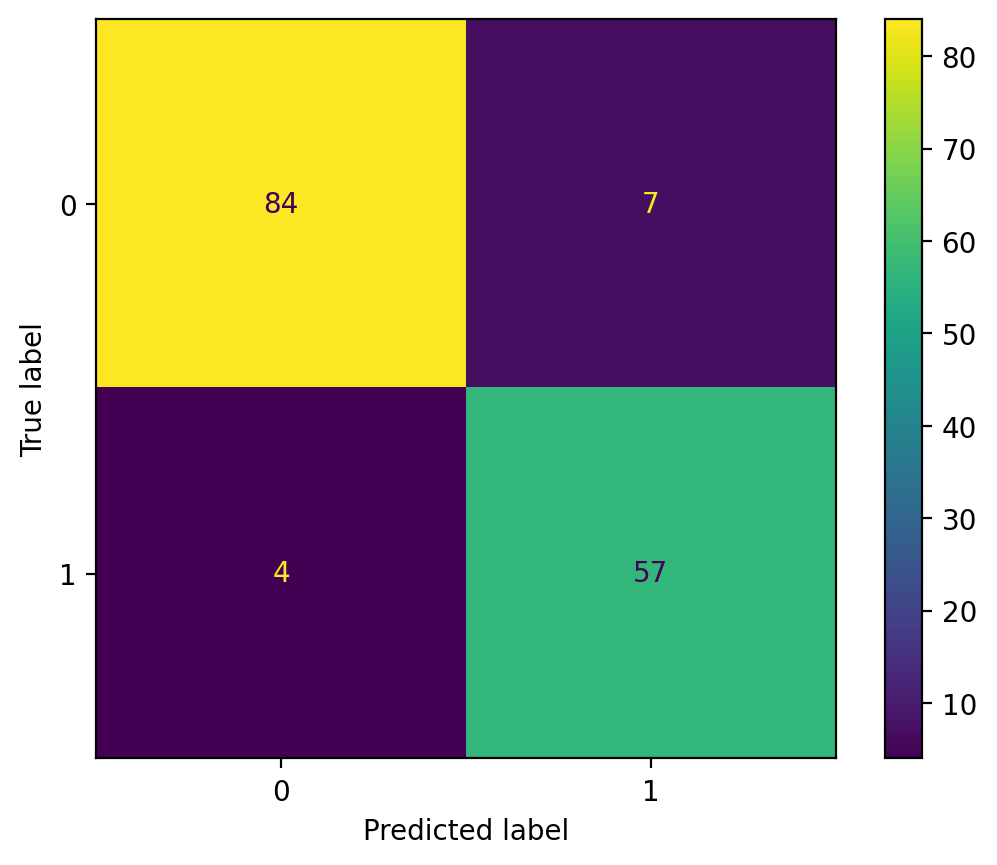

In [ ]:
cm = confusion_matrix(y_test, forest3_pred)
ConfusionMatrixDisplay(cm).plot()

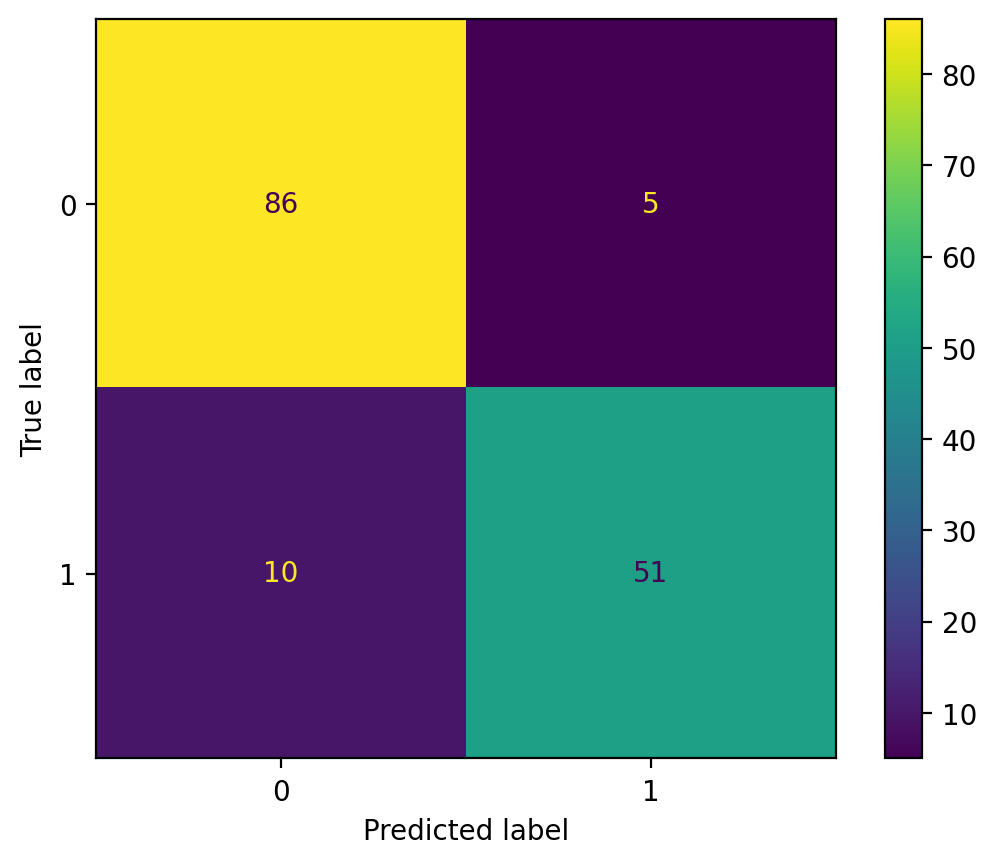

In [ ]:
cm = confusion_matrix(y_test, forest4_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Acuracidade
print("Pipeline com Randon Forest")
print("ACC (Completo): %.3f" %(accuracy_score(y_test,forest_pred)))
print("ACC (MI): %.3f" %(accuracy_score(y_test,forest1_pred)))
print("ACC: (dropC) %.3f" %(accuracy_score(y_test,forest2_pred)))
print("ACC: (smartC) %.3f" %(accuracy_score(y_test,forest3_pred)))
print("ACC: (Anova) %.3f" %(accuracy_score(y_test,forest4_pred)))
# print("ACC: (KNN-MI) %.3f" %(accuracy_score(y_test,knn1_pred)))
#Revocação
print("Recall (Completo):%.2f" %(recall_score(y_test,forest_pred)))
print("Recall (MI):%.2f" %(recall_score(y_test,forest1_pred)))
print("Recall (dropC):%.2f" %(recall_score(y_test,forest2_pred)))
print("Recall (smartC):%.2f" %(recall_score(y_test,forest3_pred)))
print("Recall (Anova):%.2f" %(recall_score(y_test,forest4_pred)))
#Precisão
print("Precision (Completo):%.2f" %(precision_score(y_test,forest_pred)))
print("Precision (MI):%.2f" %(precision_score(y_test,forest1_pred)))
print("Precision (dropC):%.2f" %(precision_score(y_test,forest2_pred)))
print("Precision (smartC):%.2f" %(precision_score(y_test,forest3_pred)))
print("Precision (Anova):%.2f" %(precision_score(y_test,forest4_pred)))
#F1-score
print("F1-score (Completo):%.2f" %(f1_score(y_test,forest_pred)))
print("F1-score (MI):%.2f" %(f1_score(y_test,forest1_pred)))
print("F1-score (dropC):%.2f" %(f1_score(y_test,forest2_pred)))
print("F1-score (smnartC):%.2f" %(f1_score(y_test,forest3_pred)))
print("F1-score (Anova):%.2f" %(f1_score(y_test,forest4_pred)))


Pipeline com Randon Forest
ACC (Completo): 0.888
ACC (MI): 0.875
ACC: (dropC) 0.914
ACC: (smartC) 0.928
ACC: (Anova) 0.901
Recall (Completo):0.82
Recall (MI):0.82
Recall (dropC):0.90
Recall (smartC):0.93
Recall (Anova):0.84
Precision (Completo):0.89
Precision (MI):0.86
Precision (dropC):0.89
Precision (smartC):0.89
Precision (Anova):0.91
F1-score (Completo):0.85
F1-score (MI):0.84
F1-score (dropC):0.89
F1-score (smnartC):0.91
F1-score (Anova):0.87


#### Similaridade das Features

In [ ]:
featuresMutualInfromation = forest1[:-1].get_feature_names_out()
featuresBruteForce = forest2[:-1].get_feature_names_out()
featuresSmartCorr = forest3[:-1].get_feature_names_out()
featuresAnova = forest4[:-1].get_feature_names_out()

In [ ]:
# Mutual Information
print(featuresMutualInfromation)
# Brute Force
print(featuresBruteForce)
# Smart Correlation
print(featuresSmartCorr)
# Anova
print(featuresAnova)

['mean_radius' 'mean_perimeter' 'mean_area' 'mean_compactness'
 'mean_concavity' 'mean_concave_points' 'radius_error' 'perimeter_error'
 'area_error' 'worst_radius' 'worst_perimeter' 'worst_area'
 'worst_compactness' 'worst_concavity' 'worst_concave_points']
['mean_radius', 'mean_texture', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error', 'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
['mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error', 'area_error', 'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst

#### Diagrama de Venn (Até 4 conjuntos)
* Biblioteca Vennforest4Py
* https://pypi.org/project/venny4py/

In [ ]:
# !pip install milkviz
!pip install venny4py

In [ ]:
# import matplotlib_venn as venn
# import milkviz as mv
from venny4py.venny4py import *

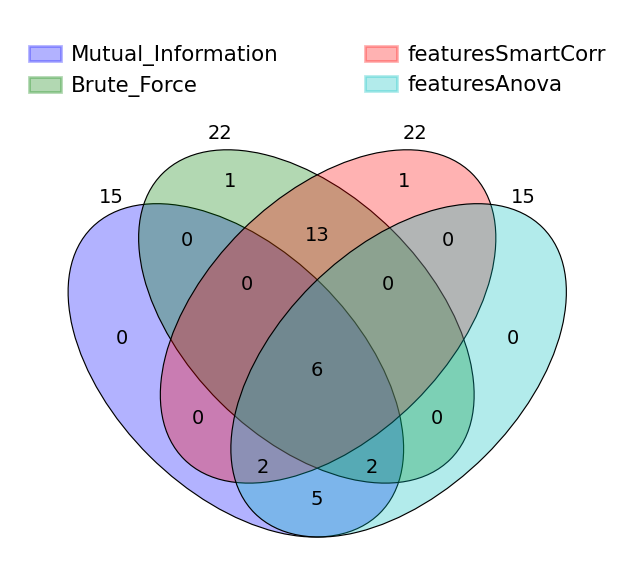

In [ ]:
#dict of sets
sets = {
    'Mutual_Information': set(featuresMutualInfromation),
    'Brute_Force': set(featuresBruteForce),
    'featuresSmartCorr': set(featuresSmartCorr),
    'featuresAnova': set(featuresAnova)
}

venny4py(sets=sets)

#### Features similares entre as 4 abordagens

In [ ]:
set(featuresMutualInfromation).intersection(featuresBruteForce,featuresSmartCorr,featuresAnova)

{'mean_compactness',
 'mean_concavity',
 'radius_error',
 'worst_compactness',
 'worst_concave_points',
 'worst_concavity'}